In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def plot(x, y, x_label="", y_label="", title=""):
    fig, ax = plt.subplots()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    ax.plot(x, y)
    plt.show()

def show(z, x, y, xlabel="", ylabel="", title=""):
    # Get the height and width of the data
    h, w = z.shape

    # Length per pixel.
    lpp_x = np.mean(np.diff(x))
    lpp_y = np.mean(np.diff(y))
    
    # Calculate tick positions and labels
    step_x = w / 8 # Divide by 10 for 10 tick marks
    step_y = h / 8
    x_ticks = np.array([step_x * i for i in range(9)])  # 0 to 10
    y_ticks = np.array([step_y * i for i in range(9)])  # 0 to 10
    
    # Create labels based on tick positions relative to the center of the image
    x_labels = [f'{(tick - w / 2) * lpp_x:.1f}' for tick in x_ticks]
    y_labels = [f'{(tick - h / 2) * lpp_y:.1f}' for tick in y_ticks]
    
    # Display the data using imshow
    plt.imshow(z, cmap='viridis')
    
    # Set custom tick labels for x and y axes
    plt.xticks(ticks=x_ticks.astype(int), labels=x_labels)
    plt.yticks(ticks=y_ticks.astype(int), labels=y_labels)

    plt.colorbar()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.axis('equal')
    plt.show()

def get_z(h, w, num_points):
    x = np.linspace(-w/2, w/2, num_points)
    y = np.linspace(-h/2, h/2, num_points)
    xg, yg = np.meshgrid(x, y)
    zg = xg + 1j * yg
    return zg, xg, yg

# Data needs to be scatter for this.
def complex_phase_plot(x, y, z, colors, cmap='viridis', elev=30, azim=22.5):
    # Create a 3D scatter plot.
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot with color based on the `colors` vector.
    scatter = ax.scatter(x, y, z, c=colors, cmap=cmap, marker='o')
    
    # Add color bar to indicate the value of the color parameter.
    cbar = plt.colorbar(scatter)
    cbar.set_label('Phase Angle')

    # Set labels.
    ax.set_xlabel('Re(z)')
    ax.set_ylabel('Im(z)')
    ax.set_zlabel('|Z|')

    # Set viewing angle.
    ax.view_init(elev=elev, azim=azim)

    plt.tight_layout()

    # Show plot.
    plt.show()

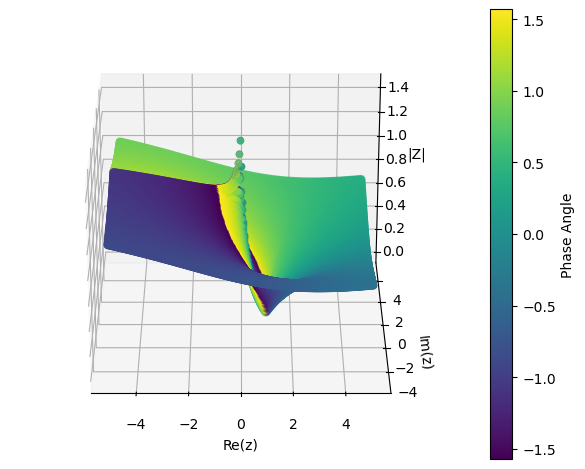

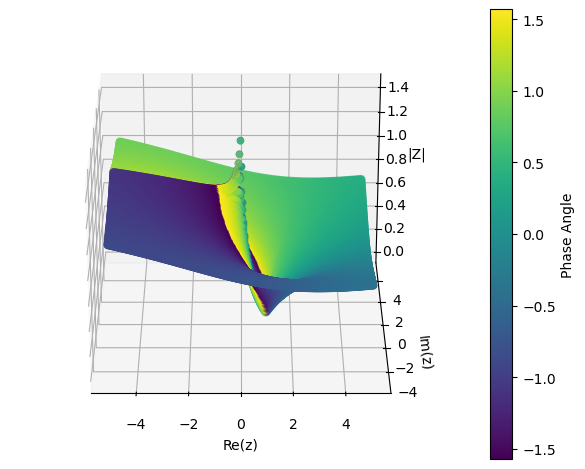

In [68]:
zg, xg, yg = get_z(h=10, w=10, num_points=250)
z, x, y = zg.flatten(), xg.flatten(), yg.flatten()
alpha = 0.33
func_vals = np.log(z ** alpha)
func_vals_2 = alpha * np.log(z)
phase = np.arctan(np.imag(func_vals) / np.real(func_vals))
phase_2 = np.arctan(np.imag(func_vals_2) / np.real(func_vals_2))
mag = np.abs(func_vals)
mag_2 = np.abs(func_vals_2)
complex_phase_plot(x=x, y=y, z=mag, colors=phase, cmap='viridis', elev=25, azim=270)
complex_phase_plot(x=x, y=y, z=mag_2, colors=phase_2, cmap='viridis', elev=25, azim=270)